# DEPLOYMENT

**Welcome to deployment section! In this section of the course, we will go through the entire deployment process, starting as if you had to create a servicable model from scratch, then deploy it for others to use, either through API or a web form.**

# Data

For this example we use the very common data set: [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), which is about flowers. 

From Wikipedia:
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.[1] It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.[2] Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".[3]

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
iris = pd.read_csv("../DATA/iris.csv")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Processing

### Features and Target

In [4]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
X = iris.drop('species',axis=1)
y = iris['species']

In [6]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
# Lots of ways to one hot encode
# https://stackoverflow.com/questions/47573293/unable-to-transform-string-column-to-categorical-matrix-using-keras-and-sklearn
# https://stackoverflow.com/questions/35107559/one-hot-encoding-of-string-categorical-features

In [7]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [8]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Scaling

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(X_train)

MinMaxScaler()

In [13]:
scaled_X_train = scaler.transform(X_train)

In [14]:
scaled_X_test = scaler.transform(X_test)

## Model


### Creating the Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()
model.add(Dense(units=4,activation='relu',input_shape=[4,]))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

## Model Training

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
early_stop = EarlyStopping(patience=10)

In [19]:
model.fit(x=scaled_X_train, 
          y=y_train, 
          epochs=300,
          validation_data=(scaled_X_test, y_test), verbose=1 ,callbacks=[early_stop]         )

Epoch 1/300
4/4 [==============================] - 0s 71ms/step - loss: 1.2651 - accuracy: 0.6333 - val_loss: 1.1583 - val_accuracy: 0.7000
Epoch 2/300
4/4 [==============================] - 0s 6ms/step - loss: 1.2590 - accuracy: 0.6167 - val_loss: 1.1547 - val_accuracy: 0.6667
Epoch 3/300
4/4 [==============================] - 0s 6ms/step - loss: 1.2518 - accuracy: 0.6167 - val_loss: 1.1514 - val_accuracy: 0.7000
Epoch 4/300
4/4 [==============================] - 0s 6ms/step - loss: 1.2454 - accuracy: 0.6250 - val_loss: 1.1481 - val_accuracy: 0.7000
Epoch 5/300
4/4 [==============================] - 0s 5ms/step - loss: 1.2390 - accuracy: 0.6167 - val_loss: 1.1450 - val_accuracy: 0.6667
Epoch 6/300
4/4 [==============================] - 0s 6ms/step - loss: 1.2326 - accuracy: 0.6167 - val_loss: 1.1421 - val_accuracy: 0.6667
Epoch 7/300
4/4 [==============================] - 0s 5ms/step - loss: 1.2268 - accuracy: 0.6167 - val_loss: 1.1392 - val_accuracy: 0.6667
Epoch 8/300
4/4 [=========

4/4 [==============================] - 0s 5ms/step - loss: 1.1017 - accuracy: 0.0750 - val_loss: 1.0933 - val_accuracy: 0.1000
Epoch 60/300
4/4 [==============================] - 0s 8ms/step - loss: 1.1005 - accuracy: 0.0583 - val_loss: 1.0926 - val_accuracy: 0.1000
Epoch 61/300
4/4 [==============================] - 0s 17ms/step - loss: 1.0995 - accuracy: 0.0583 - val_loss: 1.0920 - val_accuracy: 0.1000
Epoch 62/300
4/4 [==============================] - 0s 28ms/step - loss: 1.0986 - accuracy: 0.0667 - val_loss: 1.0915 - val_accuracy: 0.1000
Epoch 63/300
4/4 [==============================] - 0s 6ms/step - loss: 1.0975 - accuracy: 0.0667 - val_loss: 1.0909 - val_accuracy: 0.1333
Epoch 64/300
4/4 [==============================] - 0s 7ms/step - loss: 1.0965 - accuracy: 0.0667 - val_loss: 1.0903 - val_accuracy: 0.1333
Epoch 65/300
4/4 [==============================] - 0s 6ms/step - loss: 1.0955 - accuracy: 0.0667 - val_loss: 1.0896 - val_accuracy: 0.1333
Epoch 66/300
4/4 [=============

4/4 [==============================] - 0s 5ms/step - loss: 1.0189 - accuracy: 0.4000 - val_loss: 1.0185 - val_accuracy: 0.3333
Epoch 118/300
4/4 [==============================] - 0s 5ms/step - loss: 1.0167 - accuracy: 0.4000 - val_loss: 1.0164 - val_accuracy: 0.3333
Epoch 119/300
4/4 [==============================] - 0s 5ms/step - loss: 1.0144 - accuracy: 0.4000 - val_loss: 1.0143 - val_accuracy: 0.3333
Epoch 120/300
4/4 [==============================] - 0s 5ms/step - loss: 1.0122 - accuracy: 0.4000 - val_loss: 1.0121 - val_accuracy: 0.3000
Epoch 121/300
4/4 [==============================] - 0s 5ms/step - loss: 1.0097 - accuracy: 0.4000 - val_loss: 1.0099 - val_accuracy: 0.3000
Epoch 122/300
4/4 [==============================] - 0s 5ms/step - loss: 1.0074 - accuracy: 0.4000 - val_loss: 1.0077 - val_accuracy: 0.3000
Epoch 123/300
4/4 [==============================] - 0s 4ms/step - loss: 1.0051 - accuracy: 0.3917 - val_loss: 1.0054 - val_accuracy: 0.3000
Epoch 124/300
4/4 [========

4/4 [==============================] - 0s 5ms/step - loss: 0.7980 - accuracy: 0.4250 - val_loss: 0.8097 - val_accuracy: 0.4000
Epoch 176/300
4/4 [==============================] - 0s 5ms/step - loss: 0.7933 - accuracy: 0.4167 - val_loss: 0.8055 - val_accuracy: 0.4000
Epoch 177/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7888 - accuracy: 0.4167 - val_loss: 0.8013 - val_accuracy: 0.4000
Epoch 178/300
4/4 [==============================] - 0s 10ms/step - loss: 0.7842 - accuracy: 0.4167 - val_loss: 0.7972 - val_accuracy: 0.4000
Epoch 179/300
4/4 [==============================] - 0s 8ms/step - loss: 0.7798 - accuracy: 0.4167 - val_loss: 0.7931 - val_accuracy: 0.4000
Epoch 180/300
4/4 [==============================] - 0s 11ms/step - loss: 0.7754 - accuracy: 0.4167 - val_loss: 0.7890 - val_accuracy: 0.4000
Epoch 181/300
4/4 [==============================] - 0s 13ms/step - loss: 0.7710 - accuracy: 0.4167 - val_loss: 0.7850 - val_accuracy: 0.4000
Epoch 182/300
4/4 [=====

4/4 [==============================] - 0s 10ms/step - loss: 0.6013 - accuracy: 0.6833 - val_loss: 0.6375 - val_accuracy: 0.6000
Epoch 234/300
4/4 [==============================] - 0s 8ms/step - loss: 0.5990 - accuracy: 0.6833 - val_loss: 0.6356 - val_accuracy: 0.6000
Epoch 235/300
4/4 [==============================] - 0s 7ms/step - loss: 0.5968 - accuracy: 0.6833 - val_loss: 0.6338 - val_accuracy: 0.6000
Epoch 236/300
4/4 [==============================] - 0s 5ms/step - loss: 0.5947 - accuracy: 0.6833 - val_loss: 0.6321 - val_accuracy: 0.6000
Epoch 237/300
4/4 [==============================] - 0s 5ms/step - loss: 0.5924 - accuracy: 0.6833 - val_loss: 0.6301 - val_accuracy: 0.6000
Epoch 238/300
4/4 [==============================] - 0s 5ms/step - loss: 0.5904 - accuracy: 0.6833 - val_loss: 0.6285 - val_accuracy: 0.6000
Epoch 239/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5882 - accuracy: 0.6833 - val_loss: 0.6268 - val_accuracy: 0.6000
Epoch 240/300
4/4 [=======

Epoch 291/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5143 - accuracy: 0.6833 - val_loss: 0.5633 - val_accuracy: 0.6000
Epoch 292/300
4/4 [==============================] - 0s 5ms/step - loss: 0.5133 - accuracy: 0.6833 - val_loss: 0.5623 - val_accuracy: 0.6000
Epoch 293/300
4/4 [==============================] - 0s 5ms/step - loss: 0.5124 - accuracy: 0.6833 - val_loss: 0.5613 - val_accuracy: 0.6000
Epoch 294/300
4/4 [==============================] - 0s 5ms/step - loss: 0.5115 - accuracy: 0.6833 - val_loss: 0.5604 - val_accuracy: 0.6000
Epoch 295/300
4/4 [==============================] - 0s 5ms/step - loss: 0.5106 - accuracy: 0.6833 - val_loss: 0.5594 - val_accuracy: 0.6000
Epoch 296/300
4/4 [==============================] - 0s 4ms/step - loss: 0.5097 - accuracy: 0.6833 - val_loss: 0.5586 - val_accuracy: 0.6000
Epoch 297/300
4/4 [==============================] - 0s 5ms/step - loss: 0.5088 - accuracy: 0.6833 - val_loss: 0.5576 - val_accuracy: 0.6000
Epoch 298/300

## Model Evaluation

In [20]:
metrics = pd.DataFrame(model.history.history)

In [21]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.265147,0.633333,1.158327,0.700000
1,1.259041,0.616667,1.154703,0.666667
2,1.251809,0.616667,1.151352,0.700000
3,1.245366,0.625000,1.148135,0.700000
4,1.238999,0.616667,1.145048,0.666667
...,...,...,...,...
295,0.509690,0.683333,0.558575,0.600000
296,0.508786,0.683333,0.557608,0.600000
297,0.507885,0.683333,0.556743,0.600000
298,0.507027,0.683333,0.555866,0.600000


<AxesSubplot:>

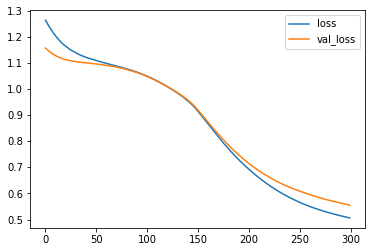

In [22]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

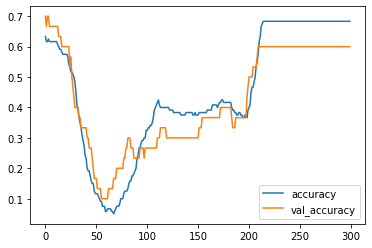

In [23]:
metrics[['accuracy','val_accuracy']].plot()

In [24]:
model.evaluate(scaled_X_test,y_test,verbose=0)

[0.5550878643989563, 0.6000000238418579]

## Ready Model for Deployment

In [25]:
epochs = len(metrics)

In [26]:
scaled_X = scaler.fit_transform(X)

In [27]:
model = Sequential()
model.add(Dense(units=4,activation='relu'))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.fit(scaled_X,y,epochs=epochs)

Epoch 1/300
5/5 [==============================] - 0s 748us/step - loss: 1.0795 - accuracy: 0.3333
Epoch 2/300
5/5 [==============================] - 0s 748us/step - loss: 1.0753 - accuracy: 0.3333
Epoch 3/300
5/5 [==============================] - 0s 997us/step - loss: 1.0714 - accuracy: 0.3333
Epoch 4/300
5/5 [==============================] - 0s 499us/step - loss: 1.0676 - accuracy: 0.3333
Epoch 5/300
5/5 [==============================] - 0s 748us/step - loss: 1.0638 - accuracy: 0.3333
Epoch 6/300
5/5 [==============================] - 0s 748us/step - loss: 1.0598 - accuracy: 0.3333
Epoch 7/300
5/5 [==============================] - 0s 748us/step - loss: 1.0560 - accuracy: 0.3533
Epoch 8/300
5/5 [==============================] - 0s 748us/step - loss: 1.0522 - accuracy: 0.3800
Epoch 9/300
5/5 [==============================] - 0s 748us/step - loss: 1.0484 - accuracy: 0.4000
Epoch 10/300
5/5 [==============================] - 0s 748us/step - loss: 1.0446 - accuracy: 0.4467
Epoch 11/

5/5 [==============================] - 0s 499us/step - loss: 0.8444 - accuracy: 0.6667
Epoch 84/300
5/5 [==============================] - 0s 499us/step - loss: 0.8418 - accuracy: 0.6667
Epoch 85/300
5/5 [==============================] - 0s 499us/step - loss: 0.8391 - accuracy: 0.6667
Epoch 86/300
5/5 [==============================] - 0s 748us/step - loss: 0.8365 - accuracy: 0.6667
Epoch 87/300
5/5 [==============================] - 0s 499us/step - loss: 0.8339 - accuracy: 0.6667
Epoch 88/300
5/5 [==============================] - 0s 498us/step - loss: 0.8312 - accuracy: 0.6667
Epoch 89/300
5/5 [==============================] - 0s 998us/step - loss: 0.8285 - accuracy: 0.6667
Epoch 90/300
5/5 [==============================] - 0s 499us/step - loss: 0.8259 - accuracy: 0.6667
Epoch 91/300
5/5 [==============================] - 0s 499us/step - loss: 0.8234 - accuracy: 0.6667
Epoch 92/300
5/5 [==============================] - 0s 499us/step - loss: 0.8207 - accuracy: 0.6667
Epoch 93/300


5/5 [==============================] - 0s 749us/step - loss: 0.6301 - accuracy: 0.8200
Epoch 165/300
5/5 [==============================] - 0s 499us/step - loss: 0.6273 - accuracy: 0.8267
Epoch 166/300
5/5 [==============================] - 0s 499us/step - loss: 0.6247 - accuracy: 0.8200
Epoch 167/300
5/5 [==============================] - 0s 748us/step - loss: 0.6217 - accuracy: 0.8267
Epoch 168/300
5/5 [==============================] - 0s 748us/step - loss: 0.6189 - accuracy: 0.8333
Epoch 169/300
5/5 [==============================] - 0s 499us/step - loss: 0.6161 - accuracy: 0.8400
Epoch 170/300
5/5 [==============================] - 0s 499us/step - loss: 0.6134 - accuracy: 0.8333
Epoch 171/300
5/5 [==============================] - 0s 748us/step - loss: 0.6106 - accuracy: 0.8333
Epoch 172/300
5/5 [==============================] - 0s 499us/step - loss: 0.6077 - accuracy: 0.8467
Epoch 173/300
5/5 [==============================] - 0s 499us/step - loss: 0.6051 - accuracy: 0.8467
Epoc

5/5 [==============================] - 0s 499us/step - loss: 0.4438 - accuracy: 0.9000
Epoch 246/300
5/5 [==============================] - 0s 748us/step - loss: 0.4421 - accuracy: 0.9000
Epoch 247/300
5/5 [==============================] - 0s 748us/step - loss: 0.4404 - accuracy: 0.9000
Epoch 248/300
5/5 [==============================] - 0s 748us/step - loss: 0.4388 - accuracy: 0.9000
Epoch 249/300
5/5 [==============================] - 0s 748us/step - loss: 0.4370 - accuracy: 0.9000
Epoch 250/300
5/5 [==============================] - 0s 748us/step - loss: 0.4354 - accuracy: 0.9133
Epoch 251/300
5/5 [==============================] - 0s 997us/step - loss: 0.4338 - accuracy: 0.9067
Epoch 252/300
5/5 [==============================] - 0s 997us/step - loss: 0.4321 - accuracy: 0.9133
Epoch 253/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.9067
Epoch 254/300
5/5 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.9067
Epoch 25

In [29]:
model.save("final_iris_model.h5")

### Saving Scaler

In [33]:
import joblib

In [34]:
joblib.dump(scaler,'iris_scaler.pkl')

['iris_scaler.pkl']

## Predicting a Single New Flower

In [35]:
from tensorflow.keras.models import load_model

In [36]:
flower_model = load_model("final_iris_model.h5")
flower_scaler = joblib.load("iris_scaler.pkl")

In [37]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [38]:
flower_example = {'sepal_length':5.1,
                 'sepal_width':3.5,
                 'petal_length':1.4,
                 'petal_width':0.2}

In [39]:
flower_example.keys()

dict_keys(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [40]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [47]:
def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    class_ind = model.predict(flower)
    class_ind = np.argmax(class_ind)
    
    return classes[class_ind]
                    

In [48]:
return_prediction(flower_model,flower_scaler,flower_example)

'setosa'

# CODE FOR DEPLOYMENT:

In [49]:
from tensorflow.keras.models import load_model
import joblib


flower_model = load_model("final_iris_model.h5")
flower_scaler = joblib.load("iris_scaler.pkl")


def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    class_ind = model.predict(flower)
    class_ind = np.argmax(class_ind, axis=1)
    
    return classes[class_ind]

In [50]:
flower_example = {
"sepal_length":5.1,
"sepal_width":3.5,
"petal_length":1.4,
"petal_width":0.2
}